# **AI-Powered Construction Site Safety Monitoring**

**Dataset reference :** https://www.kaggle.com/datasets/snehilsanyal/construction-site-safety-image-dataset-roboflow/data

- **No of Classes :** 10

- **Classes Names :**

   -  **0.** : 'Hardhat',
   -  **1.** : 'Mask',
   -  **2.** : 'NO-Hardhat',
   -  **3.** : 'NO-Mask',
   -  **4.** : 'NO-Safety Vest',
   -  **5.** : 'Person',
   -  **6.** : 'Safety Cone',
   -  **7.** : 'Safety Vest',
   -  **8.** : 'machinery',
   -  **9.** : 'vehicle'


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


### **Dataset preparation and YMAL file generation**

In [4]:
import os

dataset_path = "/kaggle/input"
print("Available datasets:", os.listdir(dataset_path))


Available datasets: ['yolov8', 'yolo-construction-site-ppe-dataset', 'sample-video-construction-ppe']


#### **Note :** One time run code as multiple run of this code will ask to replace our existing dataset and again create new data after unziping Dataset.zip file.

#### **Here I have created one directory for dataset and one directory for working of our project.**

In [5]:
DATA_DIR = '/kaggle/input/yolo-construction-site-ppe-dataset/Dataset'
WORK_DIR = '/kaggle/working/'

In [6]:
#-----------------------------------------------------------------------
# Run this code for only onetime to create YAML file for our dataset. --
#-----------------------------------------------------------------------

import os
import yaml

num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']
dict_file = {'train': os.path.join(DATA_DIR, 'train'),
             'val': os.path.join(DATA_DIR, 'valid'),
             'test': os.path.join(DATA_DIR, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join(WORK_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [7]:
import os
import glob

FOLDER_NAME = "labels"

matching_folders = glob.glob(f"{DATA_DIR}/**/{FOLDER_NAME}", recursive=True)

print("Matching Folders:", matching_folders)

NUM_CLASSES = 10
classes_distribution = [0] * NUM_CLASSES

for i in matching_folders:
    label_files = glob.glob(os.path.join(i, "*.txt"))
    for file_path in label_files:
        with open(file_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                class_id = line.strip().split()[0]
                if class_id.isdigit():
                    class_id = int(class_id)
                    if 0 <= class_id < NUM_CLASSES:
                        classes_distribution[class_id] += 1

print("Class Distribution:", classes_distribution)


Matching Folders: ['/kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels', '/kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/labels', '/kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels']
Class Distribution: [3334, 1700, 2427, 3250, 4158, 9872, 3502, 3135, 5346, 1628]


In [8]:
print("Class Distribution:", classes_distribution)

Class Distribution: [3334, 1700, 2427, 3250, 4158, 9872, 3502, 3135, 5346, 1628]


#### **Distribution of all the classes of this dataset on which our YOLO model will be trained.**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


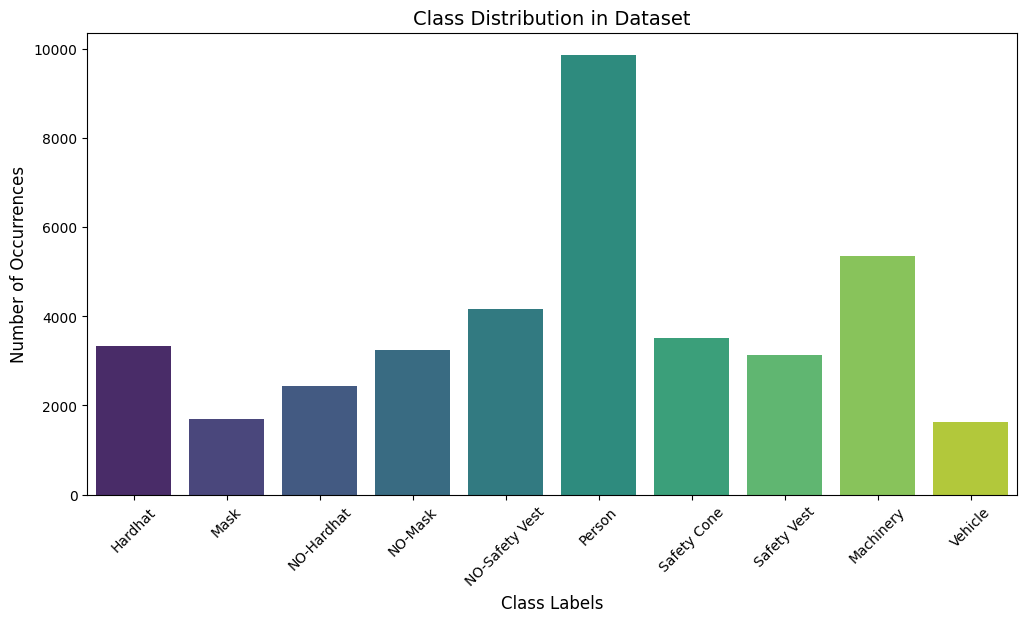

In [9]:
class_labels = [
    "Hardhat", "Mask", "NO-Hardhat", "NO-Mask", "NO-Safety Vest",
    "Person", "Safety Cone", "Safety Vest", "Machinery", "Vehicle"
]

plt.figure(figsize=(12, 6))

sns.barplot(x=class_labels, y=classes_distribution, palette="viridis")

plt.xlabel("Class Labels", fontsize=12)
plt.ylabel("Number of Occurrences", fontsize=12)
plt.title("Class Distribution in Dataset", fontsize=14)
plt.xticks(rotation=45)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


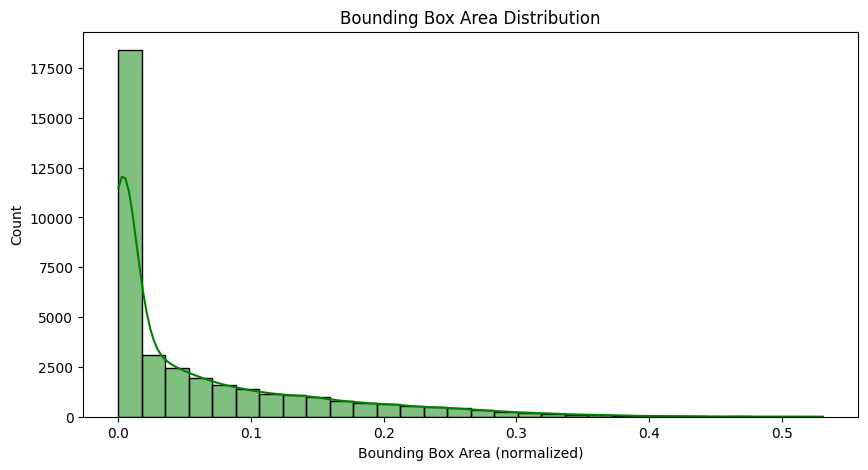

In [10]:
bbox_areas = []

for file_path in label_files:
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            _, x, y, w, h = map(float, line.strip().split())
            area = w * h
            bbox_areas.append(area)

bbox_areas = np.array(bbox_areas)

plt.figure(figsize=(10, 5))
sns.histplot(bbox_areas, bins=30, kde=True, color="green")
plt.xlabel("Bounding Box Area (normalized)")
plt.ylabel("Count")
plt.title("Bounding Box Area Distribution")
plt.show()


In [ ]:
heatmap = np.zeros((640, 640))

for file_path in label_files:
    with open(file_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            _, x, y, w, h = map(float, line.strip().split())
            x_center = int(x * 640)
            y_center = int(y * 640)
            heatmap[y_center, x_center] += 1

plt.figure(figsize=(10, 10))
sns.heatmap(heatmap, cmap="inferno")
plt.title("Bounding Box Heatmap")
plt.show()


In [6]:
import cv2

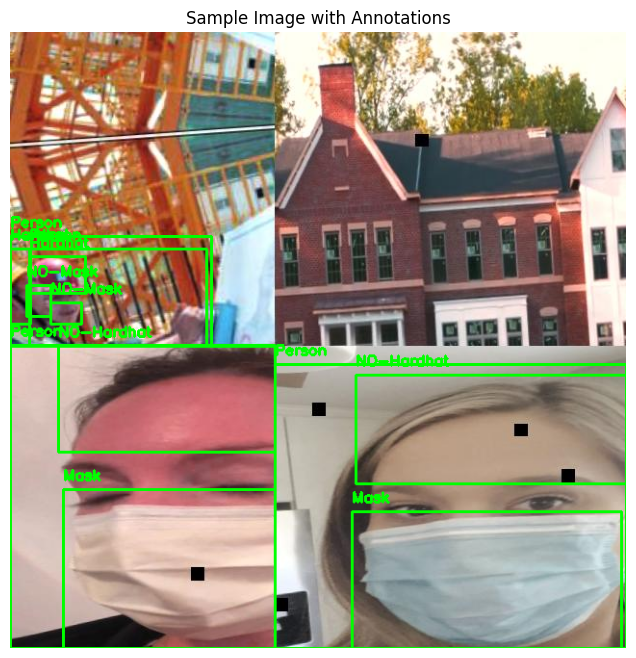

In [16]:
sample_img_path = "/kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.jpg"

img = cv2.imread(sample_img_path)
h, w, _ = img.shape

label_file = "/kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels/-1670-_png_jpg.rf.0463edb430019e01ec79eed27a6349d6.txt"

if os.path.exists(label_file):
    with open(label_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id, x, y, bbox_w, bbox_h = map(float, line.strip().split())
            x1 = int((x - bbox_w / 2) * w)
            y1 = int((y - bbox_h / 2) * h)
            x2 = int((x + bbox_w / 2) * w)
            y2 = int((y + bbox_h / 2) * h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, class_labels[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample Image with Annotations")
plt.axis("off")
plt.show()


# **YOLO model training**

In [10]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 17.9 MB/s eta 0:00:00a 0:00:01


In [14]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 123MB/s] 


In [15]:
import os

In [16]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),task='detect',imgsz=640,epochs=50,batch=-1,mode='train',name='yolov8m_v1_train')

Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 8.01MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 34.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:05<00:00, 501.11it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.26G reserved, 0.24G allocated, 14.25G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


    25862110       79.09         1.544         61.72           238        (1, 3, 640, 640)                    list
    25862110       158.2         2.150         35.66         127.6        (2, 3, 640, 640)                    list
    25862110       316.4         3.146         49.04         104.5        (4, 3, 640, 640)                    list
    25862110       632.8         4.819          80.2         150.3        (8, 3, 640, 640)                    list
    25862110        1266         8.477         154.6         279.7       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 19 for CUDA:0 9.15G/14.74G (62%) ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:02<00:00, 882.29it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 421.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8m_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00044531249999999996), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_v1_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.81G       1.26       1.85      1.423         23        640: 100%|██████████| 138/138 [01:27<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all        114        697      0.766      0.477      0.571      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.62G      1.209      1.403      1.384         17        640: 100%|██████████| 138/138 [01:35<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.691      0.466       0.52      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         8G      1.208       1.39      1.384         53        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        114        697      0.654      0.487      0.537      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.14G      1.202       1.36      1.379         71        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all        114        697      0.658      0.491      0.511      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.62G      1.179      1.285      1.361         33        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.785       0.49      0.586      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.56G      1.135      1.213      1.335         32        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.704      0.592      0.633      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.58G      1.109      1.148      1.312         41        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.753       0.55      0.626      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       7.8G      1.085      1.109      1.296         59        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.765      0.614      0.671      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.18G      1.058      1.061       1.28         15        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.845      0.587      0.687      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.74G      1.042      1.013      1.266         80        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.817      0.613      0.698      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.97G      1.012     0.9713       1.25         28        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.842      0.636      0.725      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.49G     0.9901     0.9327      1.239         44        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        114        697      0.788      0.616      0.679      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.61G     0.9778     0.8996      1.224         40        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.821      0.636      0.719      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.95G     0.9682     0.8816      1.211         40        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.851      0.672      0.733      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.14G      0.951     0.8566      1.211         46        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.851      0.677      0.756      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.89G     0.9346     0.8332      1.203         48        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.817      0.698       0.75      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.52G     0.9164     0.8161      1.188         57        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697       0.86      0.666      0.744      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.21G     0.9025     0.7861      1.176         34        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.843      0.693      0.763      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.54G     0.8901     0.7648      1.165         55        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697       0.84      0.705      0.767      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       7.6G      0.873     0.7458      1.156         36        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.829      0.726      0.779      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.33G      0.869     0.7259      1.148         42        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.863      0.702      0.773      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.34G     0.8601     0.7126      1.143         20        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.857      0.719      0.793      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.91G     0.8463     0.7036      1.134         71        640: 100%|██████████| 138/138 [01:35<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.902      0.709      0.801      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.53G     0.8356     0.6915      1.129         70        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.894      0.721      0.804       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.51G     0.8142     0.6666      1.115         34        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.876      0.706      0.788      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.37G     0.8121     0.6523      1.115         31        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.916      0.735      0.809      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.05G     0.8008     0.6393      1.104         59        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.884      0.752      0.816       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.78G     0.7899     0.6255      1.095         25        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.935      0.723      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.15G     0.7795     0.6179      1.092         29        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.922       0.73       0.82      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.54G     0.7617     0.6028      1.088         22        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.886      0.743      0.813      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         8G     0.7668     0.5961      1.086        123        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.876      0.759      0.822      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.22G     0.7511      0.578      1.071         27        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.902      0.751      0.813      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.48G     0.7339     0.5622      1.063         39        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.888      0.746      0.818      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.87G     0.7367     0.5679      1.064         33        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.928      0.762      0.842      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.85G     0.7194     0.5516      1.057         57        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.889      0.791      0.846      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.71G     0.7167     0.5535      1.055         13        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.886      0.768      0.836       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.72G      0.704     0.5347      1.048         52        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.879       0.78       0.84      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.11G     0.6926     0.5244       1.04         23        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.925      0.773      0.844      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.15G     0.6834     0.5098      1.033         37        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.938      0.771      0.848      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.76G     0.6712     0.5041      1.027         54        640: 100%|██████████| 138/138 [01:35<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.921      0.782      0.851      0.578


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.65G     0.6732     0.4424      1.025         22        640: 100%|██████████| 138/138 [01:34<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.909      0.781      0.851      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.61G     0.6529     0.4202      1.011         19        640: 100%|██████████| 138/138 [01:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697       0.94      0.757      0.847      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.53G     0.6447     0.4108      1.003         26        640: 100%|██████████| 138/138 [01:33<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.919       0.79      0.852       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.61G     0.6286     0.3956     0.9966         25        640: 100%|██████████| 138/138 [01:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.932      0.791      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.65G     0.6142     0.3896      0.991         19        640: 100%|██████████| 138/138 [01:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all        114        697      0.922      0.783      0.853      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       7.6G     0.6106     0.3884     0.9849         14        640: 100%|██████████| 138/138 [01:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all        114        697      0.922       0.78      0.856      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.64G     0.6001     0.3792      0.983         23        640: 100%|██████████| 138/138 [01:33<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.923      0.783      0.855      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.62G     0.5851     0.3674     0.9721         37        640: 100%|██████████| 138/138 [01:33<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all        114        697      0.918      0.795      0.859      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.61G     0.5789     0.3703     0.9719         17        640: 100%|██████████| 138/138 [01:33<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.65it/s]

                   all        114        697      0.938      0.786       0.86      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.62G     0.5665     0.3573     0.9621         35        640: 100%|██████████| 138/138 [01:34<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all        114        697      0.928      0.788       0.86      0.601



50 epochs completed in 1.364 hours.
Optimizer stripped from runs/detect/yolov8m_v1_train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_v1_train/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_v1_train/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]


                   all        114        697      0.928      0.788       0.86      0.601
               Hardhat         42         79      0.968      0.848      0.924       0.67
                  Mask         19         21      0.978      0.952       0.96      0.772
            NO-Hardhat         37         69      0.902      0.665      0.767      0.468
               NO-Mask         44         74      0.942      0.689      0.751       0.45
        NO-Safety Vest         56        106      0.951       0.74      0.832      0.561
                Person         84        166      0.935      0.783      0.889      0.617
           Safety Cone         13         44      0.953      0.886      0.908      0.564
           Safety Vest         28         41      0.949        0.9      0.931      0.697
             machinery         26         55      0.961      0.888      0.972      0.753
               vehicle         16         42      0.739      0.524      0.669       0.46


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/yolov8m_v1_train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792b047081c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [17]:
model.val()

Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 629.76it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]


                   all        114        697      0.918      0.795      0.862      0.601
               Hardhat         42         79      0.971      0.854      0.941      0.669
                  Mask         19         21      0.975      0.952       0.96      0.772
            NO-Hardhat         37         69      0.868      0.681      0.767      0.467
               NO-Mask         44         74      0.936      0.689      0.751      0.449
        NO-Safety Vest         56        106      0.941      0.747      0.832       0.56
                Person         84        166      0.929      0.792       0.89       0.62
           Safety Cone         13         44      0.931      0.886      0.908      0.565
           Safety Vest         28         41      0.933      0.902      0.931      0.698
             machinery         26         55      0.961      0.902      0.972      0.754
               vehicle         16         42      0.739       0.54      0.667      0.459


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.3ms preprocess, 28.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolov8m_v1_train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792b046f04c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [18]:
test_results = model.predict(source=os.path.join(DATA_DIR, 'test', 'images'), save=True)


image 1/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Hardhat, 1 NO-Safety Vest, 1 Person, 36.2ms
image 2/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 1 NO-Hardhat, 2 NO-Masks, 3 Persons, 36.1ms
image 3/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 3 Hardhats, 2 NO-Masks, 3 NO-Safety Vests, 5 Persons, 36.2ms
image 4/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Cone, 1 vehicle, 33.4ms
image 5/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 1 NO-Hardhat, 6 NO-Safety Vests, 7 Pe

In [25]:
import cv2
import matplotlib.pyplot as plt
import glob

# Get the path to saved images
predicted_images = glob.glob("runs/detect/predict/*.jpg")  # Change extension if using PNG

# Display images with bounding boxes
for img_path in predicted_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [21]:
from IPython.display import FileLink

model_path = "runs/detect/yolov8m_v1_train/weights/best.pt"

FileLink(model_path)


/kaggle/working/runs/detect/yolov8m_v1_train/weights/best.pt

In [22]:
from google.colab import files 
files.download("runs/detect/yolov8m_v1_train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from ultralytics import YOLO
import cv2

model = YOLO("runs/detect/yolov8m_v1_train/weights/best.pt")

video_path = "/kaggle/input/sample-video-construction-ppe/indianworkers.mp4"

results = model.predict(source=video_path, save=True, conf=0.5)

print("Processed video saved at:", results[0].save_dir)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 2 Safety Vests, 2 machinerys, 43.2ms
video 1/1 (frame 2/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 3 Safety Vests, 4 machinerys, 24.6ms
video 1/1 (frame 3/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 3 Safety Vests, 3 machinerys, 2

In [29]:
from google.colab import files  

files.download("runs/detect/predict/indianworkers.avi")  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
!pip install onnx2tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 16.5 MB/s eta 0:00:00


In [11]:
!pip install onnx_graphsurgeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.6 MB/s eta 0:00:00


In [12]:
!pip install sng4onnx

In [13]:
!pip install tflite_support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 26.2 MB/s eta 0:00:00:00:010:01m


In [38]:
model.export(format="onnx")

Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 2.5s, saved as 'runs/detect/yolov8m_v1_train/weights/best.onnx' (98.8 MB)

Export complete (3.8s)
Results saved to /kaggle/working/runs/detect/yolov8m_v1_train/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8m_v1_train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8m_v1_train/weights/best.onnx imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/yolov8m_v1_train/weights/best.onnx'

In [40]:
from IPython.display import FileLink

model_path = "runs/detect/yolov8m_v1_train/weights/best.onnx"

FileLink(model_path)

/kaggle/working/runs/detect/yolov8m_v1_train/weights/best.onnx

In [39]:
model.export(format="tf")

WARNING ⚠️ Invalid export format='tf', updating to format='tfjs'
Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnx2tf>1.17.5,<=1.26.3', 'protobuf>=5'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 86.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: onnx2tf
    Found existing installation: onnx2tf 1.26.8
    Uninstalling onnx2tf

'runs/detect/yolov8m_v1_train/weights/best_web_model'

In [42]:
from IPython.display import FileLinks

model_path = "runs/detect/yolov8m_v1_train/weights/best_saved_model"

FileLinks(model_path)

runs/detect/yolov8m_v1_train/weights/best_saved_model/
  metadata.yaml
  fingerprint.pb
  saved_model.pb
  best_float32.tflite
  best_float16.tflite
runs/detect/yolov8m_v1_train/weights/best_saved_model/variables/
  variables.data-00000-of-00001
  variables.index

In [43]:
model.export(format="torchscript")

Ultralytics 8.3.83 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 4.3s, saved as 'runs/detect/yolov8m_v1_train/weights/best.torchscript' (99.1 MB)

Export complete (5.5s)
Results saved to /kaggle/working/runs/detect/yolov8m_v1_train/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8m_v1_train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8m_v1_train/weights/best.torchscript imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/yolov8m_v1_train/weights/best.torchscript'

In [45]:
from IPython.display import FileLink

model_path = "runs/detect/yolov8m_v1_train/weights/best.torchscript"

FileLink(model_path)

/kaggle/working/runs/detect/yolov8m_v1_train/weights/best.torchscript

In [46]:
results_paths = [
    i for i in
    glob.glob('runs/detect/yolov8m_v1_train/*.png') +
    glob.glob('runs/detect/yolov8m_v1_train/*.jpg')
    if 'batch' not in i
]

results_paths

['runs/detect/yolov8m_v1_train/R_curve.png',
 'runs/detect/yolov8m_v1_train/PR_curve.png',
 'runs/detect/yolov8m_v1_train/confusion_matrix.png',
 'runs/detect/yolov8m_v1_train/P_curve.png',
 'runs/detect/yolov8m_v1_train/results.png',
 'runs/detect/yolov8m_v1_train/F1_curve.png',
 'runs/detect/yolov8m_v1_train/confusion_matrix_normalized.png',
 'runs/detect/yolov8m_v1_train/labels_correlogram.jpg',
 'runs/detect/yolov8m_v1_train/labels.jpg']

In [14]:
import matplotlib.pyplot as plt
import cv2

def display_image(image_path, print_info=False, hide_axis=True):
    """
    Displays an image using OpenCV and Matplotlib.
    
    Parameters:
    - image_path (str): Path to the image file.
    - print_info (bool): Whether to print image details (shape, size, etc.).
    - hide_axis (bool): Whether to hide the axis when displaying the image.
    """
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    
    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Print image details if required
    if print_info:
        print(f"Image Path: {image_path}")
        print(f"Image Shape: {image.shape}")

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    
    if hide_axis:
        plt.axis('off')  # Hide axis labels

    plt.show()


runs/detect/yolov8m_v1_train/F1_curve.png


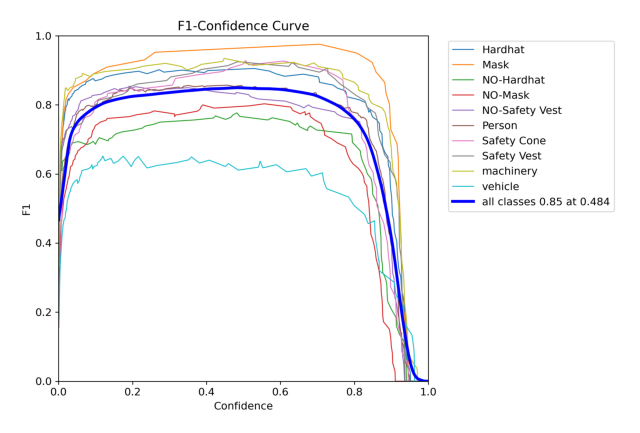



runs/detect/yolov8m_v1_train/PR_curve.png


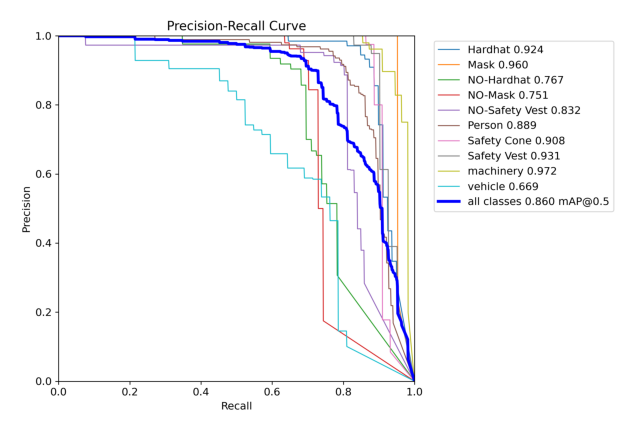



runs/detect/yolov8m_v1_train/P_curve.png


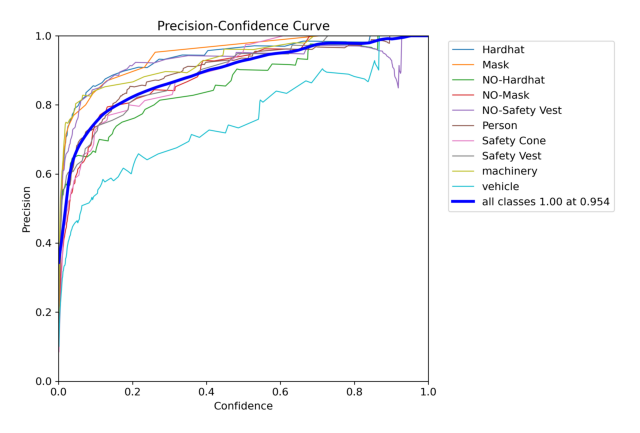



runs/detect/yolov8m_v1_train/R_curve.png


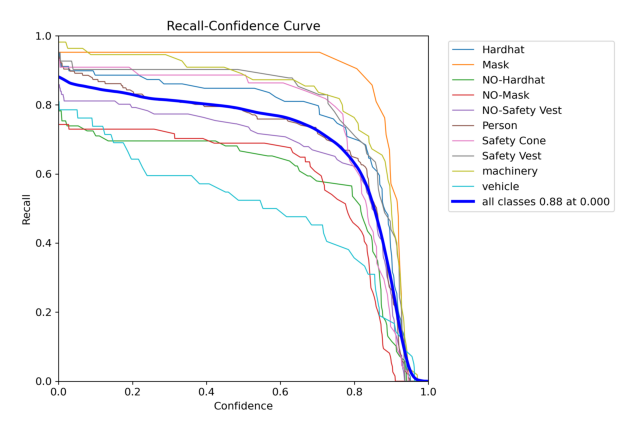



runs/detect/yolov8m_v1_train/confusion_matrix.png


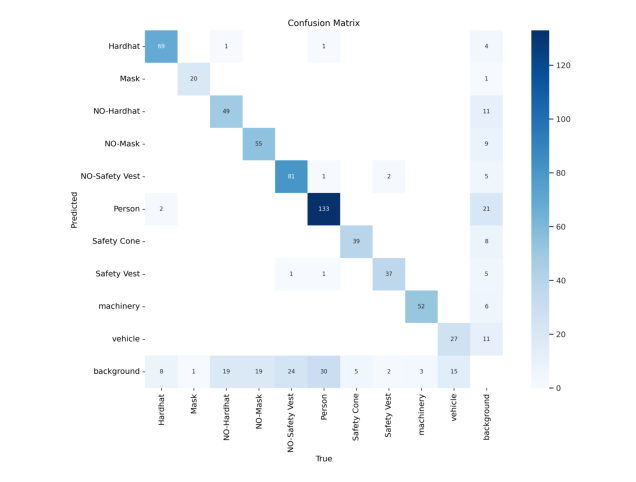



runs/detect/yolov8m_v1_train/confusion_matrix_normalized.png


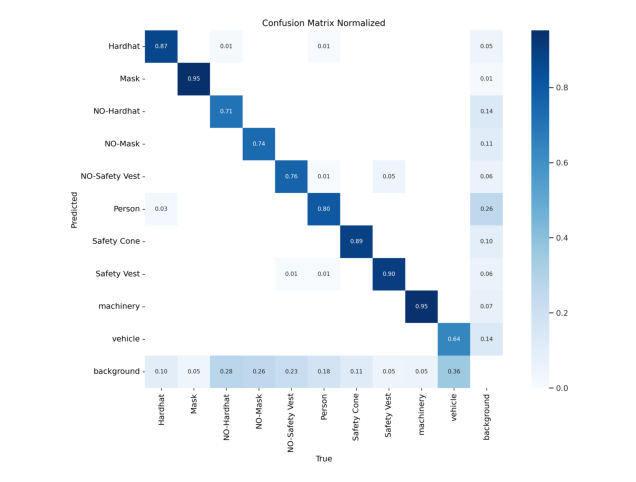



runs/detect/yolov8m_v1_train/labels.jpg


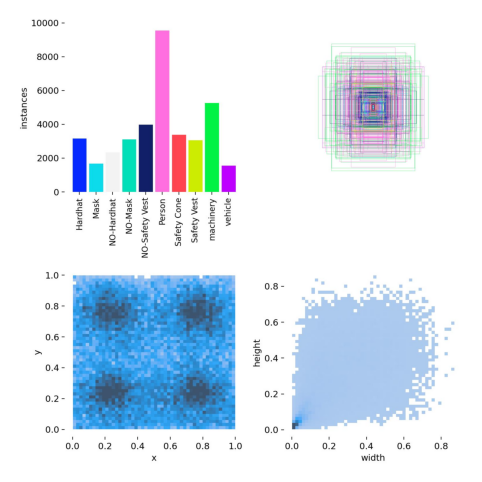



runs/detect/yolov8m_v1_train/labels_correlogram.jpg


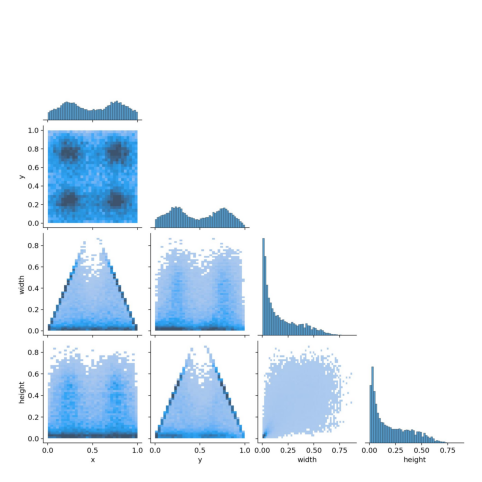



runs/detect/yolov8m_v1_train/results.png


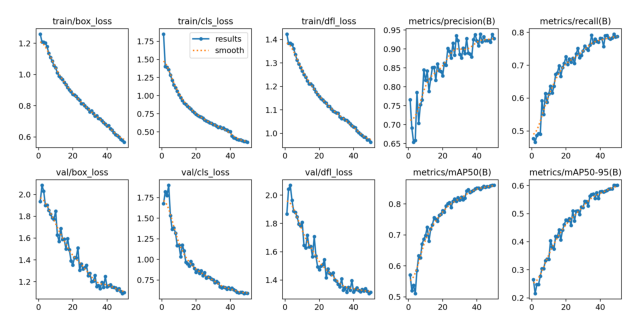

In [49]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

In [52]:
!zip -r /kaggle/working/workspace.zip /kaggle/working/


updating: kaggle/working/ (stored 0%)
updating: kaggle/working/runs/ (stored 0%)
updating: kaggle/working/runs/detect/ (stored 0%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/ (stored 0%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/val_batch0_pred.jpg (deflated 6%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/train_batch1.jpg (deflated 2%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/R_curve.png (deflated 7%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/train_batch5520.jpg (deflated 6%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/results.csv (deflated 61%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/labels_correlogram.jpg (deflated 35%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/train_batch5522.jpg (deflated 6%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/PR_curve.png (deflated 10%)
updating: kaggle/working/runs/detect/yolov8m_v1_train/confusion_matrix.png (deflated 21%)
updating: kaggle/working/run

#### Loss funcntion in this training is consisting of three componenet, 
   1. #### **box loss**
   2. #### **class loss (cls loss)**
   3. #### **objectness loss(drf loss)**

#### Total loss is calculated using these three losses.



# **YOLOv8m**

#### **Trying on YOLOv8s.pt model which is having less number of parameter and with good amount of accuracy and MAP score.**

In [11]:
!pip install ultralytics

### **Note :** 

### **I have tried to do hyperparameter tuning for the model but because of resources constrained and very long tuning time, I have selected some of the value of hyper parameter on my own. Which is genereally not the right solution but after considering the constraints we can try this out to see if there are any changes that can be seen on model performance after adding this values.**

In [9]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 119MB/s] 


In [10]:
import os

# for augmentation
# search_space = {
#     "mosaic": [0.5, 0.75, 1.0],  # Mosaic augmentation strength
#     "fliplr": [0.2, 0.5, 0.8],  # Horizontal flip probability
#     "mixup": [0.0, 0.1, 0.2]  # MixUp augmentation (0 means disabled)
# }


model.train(data=os.path.join(WORK_DIR,'data.yaml'),task='detect',imgsz=640,epochs=50,batch=-1, mosaic=0.8, mixup=0.1, degrees=5, translate=0.1, scale=0.5, shear=2, perspective=0.0005, hsv_h=0.02, hsv_s=0.6, hsv_v=0.5, fliplr=0.5, mode='train',name='yolov8m_v1_train_with_augmentation')

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_v1_train_with_augmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 7.76MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 47.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:06<00:00, 372.73it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.26G reserved, 0.24G allocated, 14.25G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


    25862110       79.09         1.544         62.31         236.6        (1, 3, 640, 640)                    list
    25862110       158.2         2.150         35.72         127.2        (2, 3, 640, 640)                    list
    25862110       316.4         3.146         60.26         127.1        (4, 3, 640, 640)                    list
    25862110       632.8         4.819         79.66         148.9        (8, 3, 640, 640)                    list
    25862110        1266         8.477         152.4         270.4       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 19 for CUDA:0 9.15G/14.74G (62%) ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:03<00:00, 807.07it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 286.38it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8m_v1_train_with_augmentation/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00044531249999999996), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_v1_train_with_augmentation
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.57G      1.463      2.016      1.578         20        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        114        697      0.681      0.493      0.548      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.14G      1.378      1.605      1.526         33        640: 100%|██████████| 138/138 [01:26<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        114        697      0.622      0.475      0.477      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.04G      1.405      1.609      1.544         42        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]

                   all        114        697      0.471      0.454      0.388      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.89G      1.409      1.608      1.554         22        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        114        697      0.684      0.461      0.503      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.63G      1.366      1.533      1.527         39        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        114        697      0.709      0.527      0.554       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.88G       1.34      1.466      1.508         41        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        114        697      0.726       0.55      0.592      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.39G      1.292      1.368      1.467         58        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.736      0.546      0.598      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.83G      1.264       1.31      1.444         22        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.705      0.559      0.589      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.94G      1.263      1.292      1.437         18        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.757      0.549      0.619      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.63G      1.253      1.274      1.432         76        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.805      0.588      0.652      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.75G      1.224      1.209      1.414         27        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.805      0.589       0.67      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.12G      1.214      1.186      1.405         85        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.816       0.61      0.696      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.42G      1.204      1.159      1.397         33        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.801      0.648      0.699      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.23G      1.183      1.133       1.38         23        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.776      0.654        0.7      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.73G       1.16      1.082      1.365         57        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]

                   all        114        697      0.794      0.624      0.701      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.57G      1.146      1.064      1.353         57        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.825      0.669      0.729      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.86G       1.14      1.038      1.347         60        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.795      0.665      0.706      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       8.2G      1.138      1.026      1.336         35        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.799      0.684      0.738      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.12G      1.136      1.023      1.341         33        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.869      0.682      0.767      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.08G      1.101     0.9753      1.315         21        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.857      0.698       0.77      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.83G      1.093     0.9524      1.312         40        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.855      0.705      0.768      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.69G      1.083      0.952      1.305         45        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697       0.89      0.703      0.789       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.86G       1.07     0.9243      1.291         27        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.854      0.718      0.765      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.84G      1.054     0.9026      1.277         48        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        114        697      0.868      0.673      0.758      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.71G      1.044     0.8894      1.277         79        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]

                   all        114        697      0.841      0.707       0.78      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.09G      1.036     0.8694      1.267         51        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.889      0.697      0.797      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.79G      1.021     0.8582      1.262         28        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.886      0.732      0.808      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.83G      1.025     0.8541      1.266         42        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.878      0.739      0.804      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         8G      1.018     0.8421      1.256         42        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.863      0.736      0.811      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       7.6G     0.9954     0.8161      1.245         30        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.896      0.723      0.819      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.94G     0.9968     0.8112       1.24         28        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.891      0.734       0.81      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.93G     0.9889     0.8124      1.237         26        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.893      0.734      0.815      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.04G     0.9694     0.7833      1.219         79        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.895      0.736      0.819      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.82G     0.9707     0.7881      1.224         19        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.894      0.754      0.823      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.97G     0.9706      0.784      1.224         31        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.885      0.754      0.823      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.94G     0.9595     0.7691      1.218         22        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.873      0.771      0.825      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.02G     0.9496     0.7547       1.21         86        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.912      0.738      0.822      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.35G     0.9458     0.7494      1.198         28        640: 100%|██████████| 138/138 [01:26<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.917      0.741      0.822      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.14G     0.9294     0.7297      1.189         34        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.924      0.745      0.833      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.22G     0.9222     0.7143      1.185        115        640: 100%|██████████| 138/138 [01:25<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.898       0.76      0.834      0.483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.66G     0.8252     0.5258      1.123         22        640: 100%|██████████| 138/138 [01:25<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.895      0.758      0.826      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.61G     0.8064     0.5034      1.108         20        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.868      0.756      0.819      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.53G     0.7938     0.4891      1.097         26        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.917      0.756      0.838      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.61G     0.7807     0.4759      1.093         31        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697      0.928      0.762      0.844        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.65G     0.7658     0.4675      1.086         17        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.902      0.761      0.837      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.63G     0.7645     0.4682      1.083         14        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.898      0.777      0.839      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.65G     0.7505     0.4553      1.077         23        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]

                   all        114        697      0.924      0.759      0.846      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.62G     0.7376     0.4433      1.063         34        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all        114        697       0.88      0.794      0.847       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.66G     0.7304     0.4467      1.062         17        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all        114        697      0.915      0.777      0.847      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.62G     0.7221     0.4323      1.052         51        640: 100%|██████████| 138/138 [01:24<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]

                   all        114        697      0.897      0.787      0.852      0.522



50 epochs completed in 1.234 hours.
Optimizer stripped from runs/detect/yolov8m_v1_train_with_augmentation/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


                   all        114        697      0.898      0.787      0.852      0.522
               Hardhat         42         79      0.984      0.795      0.906      0.582
                  Mask         19         21      0.934      0.952      0.961      0.618
            NO-Hardhat         37         69      0.855      0.623      0.757       0.42
               NO-Mask         44         74      0.828      0.676      0.728      0.366
        NO-Safety Vest         56        106      0.932      0.736       0.83      0.485
                Person         84        166      0.923      0.819      0.885      0.528
           Safety Cone         13         44      0.896      0.864      0.901      0.498
           Safety Vest         28         41      0.956      0.878        0.9      0.613
             machinery         26         55      0.832      0.903      0.944      0.694
               vehicle         16         42      0.841      0.619      0.705      0.412


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.2ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/yolov8m_v1_train_with_augmentation


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c80d4ea5000>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [11]:
model.val()

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 491.28it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]


                   all        114        697      0.898      0.787      0.849      0.521
               Hardhat         42         79      0.984      0.795      0.907       0.58
                  Mask         19         21      0.934      0.952      0.961      0.618
            NO-Hardhat         37         69      0.855      0.623      0.746      0.417
               NO-Mask         44         74      0.828      0.676      0.711      0.369
        NO-Safety Vest         56        106      0.932      0.736       0.83      0.487
                Person         84        166      0.923      0.819      0.884      0.526
           Safety Cone         13         44      0.896      0.864      0.901      0.503
           Safety Vest         28         41      0.956      0.878      0.899      0.613
             machinery         26         55      0.833      0.904      0.944      0.692
               vehicle         16         42      0.843      0.619      0.705      0.407


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.3ms preprocess, 24.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8m_v1_train_with_augmentation2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c805cc81a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [12]:
test_results = model.predict(source=os.path.join(DATA_DIR, 'test', 'images'), save=True)


image 1/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Hardhat, 1 NO-Safety Vest, 2 Persons, 37.0ms
image 2/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 2 NO-Masks, 1 NO-Safety Vest, 1 Person, 37.0ms
image 3/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 3 Hardhats, 2 NO-Masks, 2 NO-Safety Vests, 4 Persons, 37.0ms
image 4/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Cone, 37.0ms
image 5/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 1 NO-Hardhat, 6 NO-Safety Vests, 7 Persons, 

In [13]:
test_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Hardhat', 1: 'Mask', 2: 'NO-Hardhat', 3: 'NO-Mask', 4: 'NO-Safety Vest', 5: 'Person', 6: 'Safety Cone', 7: 'Safety Vest', 8: 'machinery', 9: 'vehicle'}
 obb: None
 orig_img: array([[[ 81, 113, 124],
         [ 75, 105, 116],
         [ 66,  94, 105],
         ...,
         [ 64,  60,  72],
         [ 58,  54,  66],
         [ 54,  50,  62]],
 
        [[ 77, 109, 120],
         [ 73, 103, 114],
         [ 67,  95, 106],
         ...,
         [ 58,  54,  66],
         [ 54,  50,  62],
         [ 52,  48,  60]],
 
        [[ 81, 113, 124],
         [ 81, 111, 122],
         [ 79, 108, 117],
         ...,
         [ 44,  42,  54],
         [ 45,  41,  53],
         [ 44,  40,  52]],
 
        ...,
 
        [[ 20,  20,  20],
         [ 22,  22,  22],
         [ 23,  23,  23],
         ...,
         [ 62,  66,  67],
         [ 61,  66,  6

In [14]:
import cv2
import matplotlib.pyplot as plt
import glob

# Get the path to saved images
predicted_images = glob.glob("runs/detect/predict/*.jpg")  # Change extension if using PNG

# Display images with bounding boxes
for img_path in predicted_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [16]:
from ultralytics import YOLO
import cv2

model = YOLO("runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt")

video_path = "/kaggle/input/sample-video-construction-ppe/indianworkers.mp4"

results = model.predict(source=video_path, save=True, conf=0.5)

print("Processed video saved at:", results[0].save_dir)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 3 Persons, 2 Safety Vests, 1 machinery, 44.6ms
video 1/1 (frame 2/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 3 Persons, 2 Safety Vests, 1 machinery, 25.2ms
video 1/1 (frame 3/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 2 Safety Vests, 2 machinerys, 25.

In [17]:
model.export(format="onnx")

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 311.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 183.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 287.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.9s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 14.6s, saved as 'runs/detect/yo

'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.onnx'

In [19]:
!pip install onnx2tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 17.6 MB/s eta 0:00:00


In [20]:
!pip install onnx_graphsurgeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.4 MB/s eta 0:00:00


In [21]:
!pip install sng4onnx

In [22]:
!pip install tflite_support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 29.3 MB/s eta 0:00:00:00:0100:01


In [23]:
model.export(format="tf")

WARNING ⚠️ Invalid export format='tf', updating to format='tfjs'
Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnx2tf>1.17.5,<=1.26.3', 'protobuf>=5'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 261.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: onnx2tf
    Found existing installation: onnx2tf 1.26.8
    U

100%|██████████| 1.11M/1.11M [00:00<00:00, 15.1MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.93file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 2.7s, saved as 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.onnx' (98.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success ✅ 178.0s, saved as 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best_saved_model' (247.6 MB)

TensorFlow GraphDef: starting export with tensorflow 2.17.1...
TensorFlow GraphDef: export success ✅ 3.6s, saved as 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pb' (98.8 MB)
requirements: Ultralytics requirement ['tensorflowjs'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 149.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf

'runs/detect/yolov8m_v1_train_with_augmentation/weights/best_web_model'

In [24]:
model.export(format="torchscript")

Ultralytics 8.3.84 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (49.6 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 4.7s, saved as 'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.torchscript' (99.1 MB)

Export complete (6.0s)
Results saved to /kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8m_v1_train_with_augmentation/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8m_v1_train_with_augmentation/weights/best.torchscript imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/yolov8m_v1_train_with_augmentation/weights/best.torchscript'

In [26]:
results_paths = [
    i for i in
    glob.glob('runs/detect/yolov8m_v1_train_with_augmentation/*.png') +
    glob.glob('runs/detect/yolov8m_v1_train_with_augmentation/*.jpg')
    if 'batch' not in i
]

results_paths

['runs/detect/yolov8m_v1_train_with_augmentation/PR_curve.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/results.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/P_curve.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/R_curve.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/F1_curve.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/confusion_matrix.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/confusion_matrix_normalized.png',
 'runs/detect/yolov8m_v1_train_with_augmentation/labels.jpg',
 'runs/detect/yolov8m_v1_train_with_augmentation/labels_correlogram.jpg']

runs/detect/yolov8m_v1_train_with_augmentation/F1_curve.png


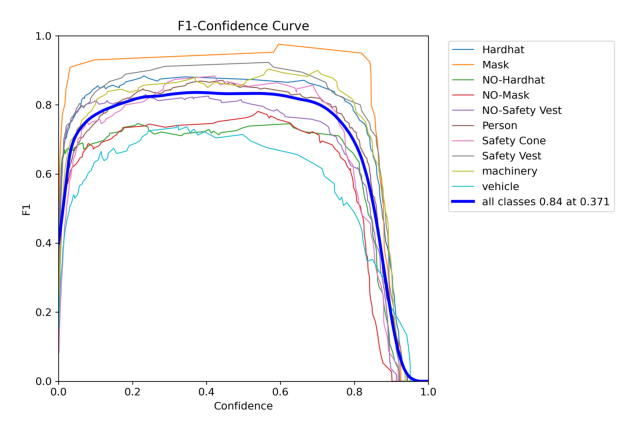



runs/detect/yolov8m_v1_train_with_augmentation/PR_curve.png


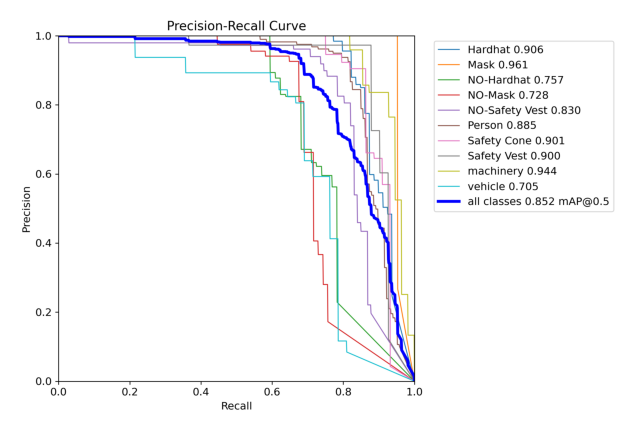



runs/detect/yolov8m_v1_train_with_augmentation/P_curve.png


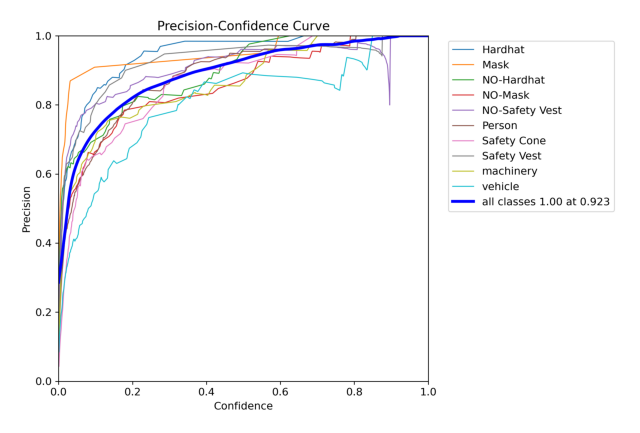



runs/detect/yolov8m_v1_train_with_augmentation/R_curve.png


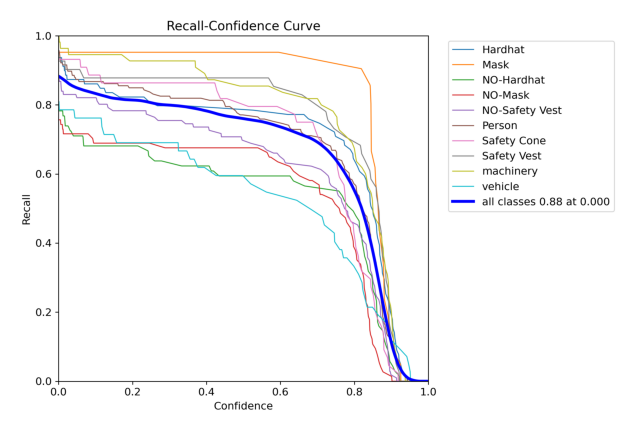



runs/detect/yolov8m_v1_train_with_augmentation/confusion_matrix.png


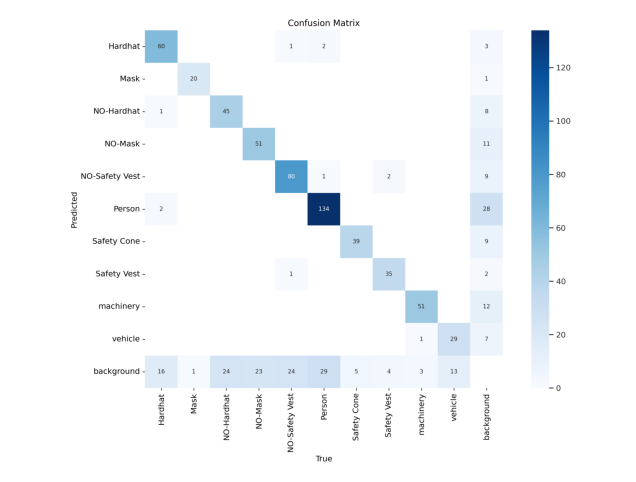



runs/detect/yolov8m_v1_train_with_augmentation/confusion_matrix_normalized.png


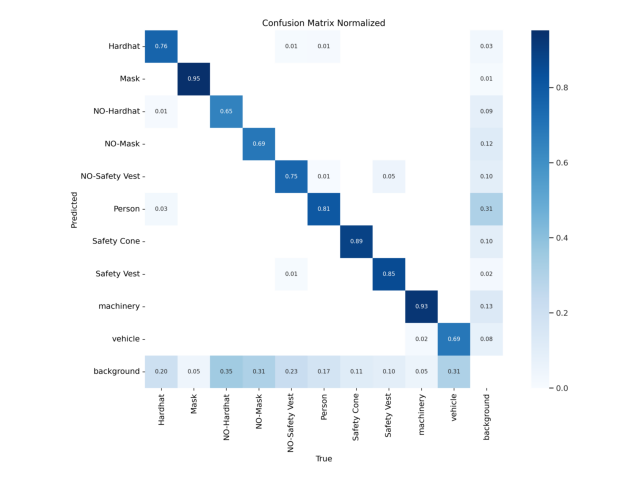



runs/detect/yolov8m_v1_train_with_augmentation/labels.jpg


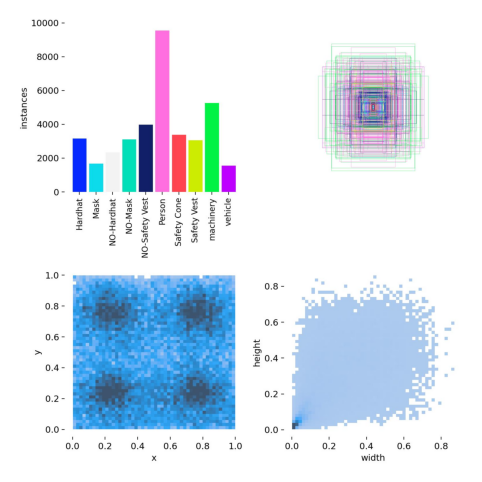



runs/detect/yolov8m_v1_train_with_augmentation/labels_correlogram.jpg


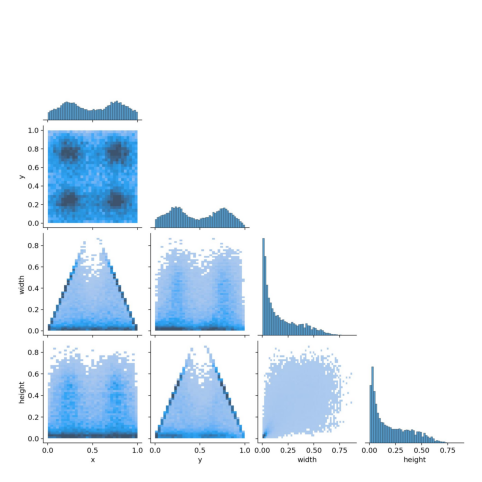



runs/detect/yolov8m_v1_train_with_augmentation/results.png


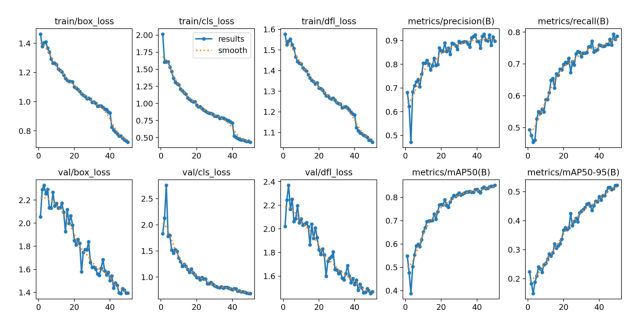

In [29]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')


In [30]:
!zip -r /kaggle/working/workspace_with_augmentation.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/data.yaml (deflated 56%)
  adding: kaggle/working/yolov8m.pt (deflated 8%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch2_labels.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch1_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/PR_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch2_pred.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/P_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/R_curve.png (deflated 7%)
  adding: 

In [31]:
from ultralytics import YOLO
import cv2

model = YOLO("runs/detect/yolov8m_v1_train_with_augmentation/weights/best.pt")

video_path = "/kaggle/input/sample-video-construction-ppe/4271760-hd_1920_1080_30fps.mp4"

results = model.predict(source=video_path, save=True, conf=0.5)

print("Processed video saved at:", results[0].save_dir)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1121) /kaggle/input/sample-video-construction-ppe/4271760-hd_1920_1080_30fps.mp4: 384x640 2 NO-Safety Vests, 4 Persons, 2 Safety Cones, 1 Safety Vest, 1 machinery, 25.6ms
video 1/1 (frame 2/1121) /kaggle/input/sample-video-construction-ppe/4271760-hd_1920_1080_30fps.mp4: 384x640 2 NO-Safety Vests, 4 Persons, 2 Safety Cones, 2 Safety Vests, 1 machinery, 24.7ms
video 1/1 (frame 3/1121) /kaggle/input/sample-video-construction-ppe/427176

In [32]:
!zip -r /kaggle/working/workspace_with_augmentation.zip /kaggle/working/

updating: kaggle/working/ (stored 0%)
updating: kaggle/working/yolo11n.pt (deflated 11%)
updating: kaggle/working/data.yaml (deflated 56%)
updating: kaggle/working/yolov8m.pt (deflated 8%)
updating: kaggle/working/runs/ (stored 0%)
updating: kaggle/working/runs/detect/ (stored 0%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/ (stored 0%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch2_labels.jpg (deflated 5%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch1_pred.jpg (deflated 6%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/PR_curve.png (deflated 10%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/val_batch2_pred.jpg (deflated 5%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/P_curve.png (deflated 7%)
updating: kaggle/working/runs/detect/yolov8m_v1_train_with_augmentation2/R_curve.png (deflated 7%)
updating: 

# **Trying with more epochs with early stopping**

In [6]:
from ultralytics import YOLO
model = YOLO('yolov8m.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
import torch
torch.cuda.empty_cache()

In [ ]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=80,
            batch=-1,
            patience=10,
            mode='train', 
            save=True,
            save_period=5,
            name='yolov8m_v1_train_with_more_epochs')


In [10]:
model.train(
    data=os.path.join(WORK_DIR, 'data.yaml'),
    task='detect',
    imgsz=640,
    epochs=45,
    batch=-1,
    mode='train',
    name='yolov8m_v1_train_with_more_epochs',
    patience=10,
    save=True,
    save_period=5,
    model='runs/detect/yolov8m_v1_train_with_more_epochs/weights/last.pt'  # Resume from last.pt
)


Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8m_v1_train_with_more_epochs/weights/last.pt, data=/kaggle/working/data.yaml, epochs=45, time=None, patience=10, batch=-1, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=None, name=yolov8m_v1_train_with_more_epochs3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, s

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:09<00:00, 286.99it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.26G reserved, 0.24G allocated, 14.25G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


    25862110       79.09         1.544         72.72         343.3        (1, 3, 640, 640)                    list
    25862110       158.2         2.150         35.66         135.1        (2, 3, 640, 640)                    list
    25862110       316.4         3.146         56.49         115.5        (4, 3, 640, 640)                    list
    25862110       632.8         4.819         79.37         149.4        (8, 3, 640, 640)                    list
    25862110        1266         8.477         154.2         269.8       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 19 for CUDA:0 9.15G/14.74G (62%) ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:03<00:00, 865.55it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 298.22it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8m_v1_train_with_more_epochs3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00044531249999999996), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8m_v1_train_with_more_epochs3
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      7.81G       1.26       1.85      1.423         23        640: 100%|██████████| 138/138 [01:23<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        114        697      0.766      0.477      0.571      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45       7.6G      1.202      1.363      1.354        546        640:   7%|▋         | 10/138 [00:06<01:29,  1.43it/s]


KeyboardInterrupt: 

# **Training on Smaller models**



### - Using YOLOv8n model for faster video inference and training.

In [5]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 87.5MB/s]


In [6]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),task='detect',imgsz=640,epochs=85,batch=-1,mode='train',name='yolov8n_v1_train_without_data_augmentation')

Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=85, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v1_train_without_data_augmentation, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:07<00:00, 360.27it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


     3012798       8.204         0.380          46.5         267.9        (1, 3, 640, 640)                    list
     3012798       16.41         0.554         21.35         101.1        (2, 3, 640, 640)                    list
     3012798       32.82         0.904         23.95         77.51        (4, 3, 640, 640)                    list
     3012798       65.63         1.514         30.55         84.31        (8, 3, 640, 640)                    list
     3012798       131.3         2.739         47.28         90.64       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 89 for CUDA:0 8.94G/14.74G (61%) ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:03<00:00, 810.87it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 353.98it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8n_v1_train_without_data_augmentation/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0006953125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_v1_train_without_data_augmentation
Starting training for 85 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/85      12.7G      1.417      3.484      1.505        728        640: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]

                   all        114        697      0.919     0.0366      0.059     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/85      12.3G       1.33      2.198       1.45        589        640: 100%|██████████| 30/30 [00:25<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all        114        697      0.774      0.215      0.361      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/85      12.4G      1.267      1.782      1.427        514        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all        114        697      0.607      0.191      0.345      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/85      13.8G      1.233      1.613      1.397        574        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all        114        697      0.521      0.345      0.349      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/85      13.3G      1.197      1.531      1.375        509        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all        114        697      0.466      0.397      0.379      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/85      14.1G      1.178      1.445      1.344        434        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        114        697      0.571      0.393      0.443      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/85      12.3G       1.16      1.375      1.326        438        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        114        697       0.61      0.405      0.446      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/85      12.6G      1.133      1.323      1.312        513        640: 100%|██████████| 30/30 [00:27<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all        114        697      0.634      0.487      0.538      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/85      12.3G      1.128      1.296      1.302        564        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        114        697      0.665      0.509       0.56      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/85      13.9G       1.11      1.269      1.294        417        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        114        697      0.651      0.532      0.559      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/85      13.1G        1.1       1.22      1.278        448        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        114        697      0.723      0.496      0.553      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/85      12.7G      1.088      1.189      1.265        540        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        114        697       0.69      0.504      0.569      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/85      13.2G      1.077      1.164      1.259        562        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.651      0.518      0.572      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/85      12.5G      1.058      1.133      1.249        582        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.644      0.555      0.582      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/85      13.1G      1.057      1.107      1.245        670        640: 100%|██████████| 30/30 [00:27<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all        114        697      0.726      0.523      0.595      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/85      12.9G      1.049      1.099      1.244        420        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all        114        697      0.701      0.548      0.593      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/85      13.3G      1.033      1.072      1.231        559        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        114        697      0.733      0.581      0.626      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/85      13.7G      1.029      1.053      1.226        514        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.772      0.599      0.667      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/85      12.4G      1.021      1.034      1.218        569        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        114        697      0.724      0.614      0.657      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/85      14.1G      1.017      1.025      1.213        591        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all        114        697      0.744      0.621      0.671      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/85      12.8G      1.008      1.011      1.209        490        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.761       0.52      0.629       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/85      14.2G     0.9976     0.9881      1.203        473        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        114        697      0.753      0.556      0.636      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/85        13G     0.9999     0.9813      1.199        412        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        114        697      0.803      0.585      0.663      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/85      13.3G     0.9872     0.9679      1.192        462        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all        114        697      0.765      0.615      0.661      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/85      14.2G     0.9743     0.9483      1.188        468        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.772      0.545      0.624      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/85      13.5G     0.9753      0.944      1.186        644        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all        114        697      0.742      0.608      0.661      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/85      13.3G     0.9641     0.9269      1.177        520        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all        114        697      0.796      0.639      0.686      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/85      13.9G     0.9659     0.9174      1.174        606        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        114        697      0.807      0.616      0.689       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/85      14.2G     0.9612     0.9145      1.176        472        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all        114        697      0.808      0.605      0.693      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/85        13G     0.9564      0.901      1.173        499        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.778      0.644      0.692      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/85      14.4G     0.9451     0.8911      1.166        447        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        114        697      0.846      0.646      0.716      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/85      12.3G     0.9479     0.8822      1.165        547        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]

                   all        114        697      0.822      0.622      0.698      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/85      12.6G     0.9247     0.8607      1.156        593        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        114        697      0.817      0.627      0.692      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/85      13.5G     0.9352     0.8542      1.155        510        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        114        697      0.804      0.622      0.695      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/85        13G      0.941     0.8591       1.16        494        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.833      0.631      0.711      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/85      12.4G     0.9187     0.8526      1.151        444        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        114        697      0.835      0.639      0.708       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/85      13.5G      0.916     0.8424      1.146        532        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.863      0.616      0.709      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/85      14.4G     0.9195      0.832      1.145        452        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        114        697      0.781      0.632      0.694      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/85      12.2G       0.91     0.8192      1.136        561        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        114        697       0.81      0.657      0.724      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/85      13.5G     0.9075     0.8109      1.134        521        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all        114        697      0.877      0.652      0.725      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/85      12.9G     0.9017     0.8134      1.134        515        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all        114        697      0.874      0.654      0.732      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/85        13G     0.9052     0.8105      1.136        466        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        114        697      0.835      0.672      0.743      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/85      14.3G     0.8933     0.8035      1.135        411        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        114        697      0.857      0.654      0.742      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/85      12.8G     0.8898     0.7936      1.128        517        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all        114        697      0.856      0.684      0.751       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/85      13.9G     0.8818     0.7805      1.127        447        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all        114        697      0.838      0.656      0.722      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/85      13.9G     0.8738     0.7724       1.12        611        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.854      0.688      0.745      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/85      13.7G     0.8774     0.7698      1.117        564        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        114        697      0.876      0.654      0.735      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/85      12.3G     0.8747      0.772      1.117        397        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.806      0.706      0.752       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/85      13.5G     0.8619     0.7654      1.112        690        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        114        697      0.879      0.678      0.764      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/85      13.1G     0.8636     0.7581      1.108        527        640: 100%|██████████| 30/30 [00:27<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all        114        697      0.879      0.683      0.763      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/85      13.3G     0.8653     0.7484      1.108        529        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        114        697      0.901      0.661      0.763      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/85      13.7G     0.8572     0.7495      1.107        543        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.904      0.665      0.756      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/85      13.1G     0.8477     0.7397      1.105        471        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        114        697      0.887      0.681      0.758      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/85      14.5G     0.8514     0.7408        1.1        546        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.881      0.671       0.75       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/85        14G     0.8456     0.7374      1.103        445        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        114        697       0.84      0.685       0.76      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/85      14.4G     0.8413     0.7296      1.102        473        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all        114        697      0.909      0.672       0.77       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/85      14.4G     0.8324     0.7153      1.092        410        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.887      0.695      0.777      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/85      14.4G     0.8296     0.7194      1.095        603        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.887      0.672      0.759      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/85      12.6G     0.8326      0.711       1.09        536        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.867      0.691      0.761       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/85      13.3G     0.8356     0.7241      1.094        594        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.818      0.698      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/85      13.8G     0.8192     0.7032      1.084        596        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        114        697      0.885      0.687      0.773      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/85      14.1G     0.8258     0.7096      1.089        487        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        114        697      0.847      0.707      0.775      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/85      12.3G      0.817     0.7019      1.086        498        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all        114        697      0.889      0.685      0.776      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/85      14.2G     0.8103     0.6911       1.08        504        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        114        697      0.858      0.717       0.79      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/85      12.3G     0.8131     0.6863      1.077        594        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        114        697      0.905      0.686      0.784      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/85      14.6G     0.8126     0.6912      1.078        556        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all        114        697      0.869      0.718      0.776      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/85      14.2G     0.8048     0.6775      1.074        495        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        114        697      0.872      0.712      0.794      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/85      13.8G     0.7965     0.6794       1.07        644        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        114        697      0.918      0.689      0.793      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/85        13G     0.8021     0.6766      1.072        592        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697       0.88      0.701      0.794      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/85      14.4G     0.8006     0.6788      1.077        340        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all        114        697      0.856      0.725      0.785      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/85      12.9G     0.7937     0.6703      1.075        485        640: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all        114        697      0.885      0.714      0.789      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/85      12.3G     0.7928     0.6702      1.066        562        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.871      0.706      0.788      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/85      13.3G     0.7864     0.6673      1.068        548        640: 100%|██████████| 30/30 [00:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        114        697      0.859      0.725      0.792      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/85      13.5G     0.7846     0.6589      1.063        546        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.888      0.719      0.799      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/85      14.4G      0.789     0.6566       1.06        664        640: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        114        697      0.912      0.702      0.798      0.489


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/85        13G     0.8096     0.6252      1.076        273        640: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        114        697      0.864      0.731      0.788      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/85      12.4G     0.7766     0.5748      1.056        423        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        114        697      0.893       0.72      0.793      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/85      11.9G     0.7706      0.567      1.057        382        640: 100%|██████████| 30/30 [00:26<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.901      0.716      0.794      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/85      11.9G     0.7631     0.5571      1.052        339        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.901      0.708      0.799      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/85      12.7G     0.7615     0.5588      1.051        326        640: 100%|██████████| 30/30 [00:26<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        114        697      0.886       0.72      0.799      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      81/85      12.4G     0.7543     0.5518      1.043        335        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.894      0.727      0.805      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      82/85      14.3G     0.7498     0.5463      1.042        282        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all        114        697      0.883      0.731      0.804        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      83/85      13.7G     0.7468     0.5472      1.038        401        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        114        697      0.888      0.732      0.807      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      84/85      13.7G     0.7398     0.5438       1.04        290        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        114        697      0.887      0.735      0.811      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      85/85      13.6G     0.7399     0.5401      1.038        326        640: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        114        697      0.884      0.732      0.811      0.501



85 epochs completed in 0.688 hours.
Optimizer stripped from runs/detect/yolov8n_v1_train_without_data_augmentation/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt, 6.3MB

Validating runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


                   all        114        697      0.884      0.732       0.81      0.501
               Hardhat         42         79      0.954       0.78      0.881      0.573
                  Mask         19         21      0.949      0.889      0.911      0.652
            NO-Hardhat         37         69       0.88      0.635      0.745      0.407
               NO-Mask         44         74      0.861      0.588      0.656      0.335
        NO-Safety Vest         56        106      0.856      0.671      0.778      0.446
                Person         84        166      0.869      0.756      0.837      0.524
           Safety Cone         13         44      0.822      0.886      0.898      0.483
           Safety Vest         28         41      0.889      0.756      0.916      0.611
             machinery         26         55      0.905      0.861      0.913      0.636
               vehicle         16         42      0.853        0.5      0.565      0.345


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/yolov8n_v1_train_without_data_augmentation


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cae30b3610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [7]:
model.val()

Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 526.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


                   all        114        697      0.886      0.733      0.811      0.501
               Hardhat         42         79      0.944      0.772      0.879       0.57
                  Mask         19         21      0.949      0.889      0.911      0.647
            NO-Hardhat         37         69       0.88      0.635      0.746      0.406
               NO-Mask         44         74      0.861      0.586      0.659      0.336
        NO-Safety Vest         56        106      0.855      0.669      0.772      0.445
                Person         84        166      0.868      0.754      0.838      0.524
           Safety Cone         13         44      0.823      0.886      0.903      0.483
           Safety Vest         28         41      0.914      0.775      0.915      0.612
             machinery         26         55      0.904       0.86      0.913      0.638
               vehicle         16         42      0.858        0.5      0.571      0.346


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 4.9ms preprocess, 4.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolov8n_v1_train_without_data_augmentation2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cae28d1e70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [8]:
test_results = model.predict(source=os.path.join(DATA_DIR, 'test', 'images'), save=True)


image 1/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 1 Hardhat, 2 NO-Safety Vests, 1 Person, 7.6ms
image 2/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 2 Hardhats, 2 NO-Masks, 4 Persons, 7.2ms
image 3/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/002551_jpg.rf.ce4b9f934161faa72c80dc6898d37b2d.jpg: 640x640 2 Hardhats, 1 NO-Mask, 2 NO-Safety Vests, 3 Persons, 7.2ms
image 4/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/003357_jpg.rf.9867f91e88089bb68dc95947d5116d14.jpg: 640x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Cone, 7.2ms
image 5/82 /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/test/images/004063_jpg.rf.1b7cdc4035bcb24ef69b8798b444053e.jpg: 640x640 5 Hardhats, 6 NO-Safety Vests, 6 Persons, 1 Safety Vest, 7.2ms
image 6/82 /kag

In [9]:
from ultralytics import YOLO
import cv2

model = YOLO("runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt")

video_path = "/kaggle/input/sample-video-construction-ppe/indianworkers.mp4"

results = model.predict(source=video_path, save=True, conf=0.5)

print("Processed video saved at:", results[0].save_dir)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 40.7ms
video 1/1 (frame 2/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 2 Persons, 1 Safety Vest, 6.5ms
video 1/1 (frame 3/648) /kaggle/input/sample-video-construction-ppe/indianworkers.mp4: 384x640 1 Hardhat, 1 NO-Hardhat, 2 Persons, 1 Safety Vest, 6.3ms
video 1/1 (frame 4/648) /ka

In [15]:
model.export(format="onnx")

Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 274.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 208.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 181.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.2s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 11.3s, saved as 'runs/de

'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.onnx'

In [16]:
model.export(format="tf")

WARNING ⚠️ Invalid export format='tf', updating to format='tfjs'
Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx2tf>1.17.5,<=1.26.3', 'protobuf>=5'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.6/445.6 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.2/316.2 kB 280.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: onnx2tf
    Found existing installation: onnx2tf 1.26.

100%|██████████| 1.11M/1.11M [00:00<00:00, 21.8MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 51.14file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.0s, saved as 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success ✅ 46.4s, saved as 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best_saved_model' (29.6 MB)

TensorFlow GraphDef: starting export with tensorflow 2.17.1...
TensorFlow GraphDef: export success ✅ 1.0s, saved as 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pb' (11.7 MB)
requirements: Ultralytics requirement ['tensorflowjs'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 266.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 315.7 MB/s eta 0:00:00
  Attempt

'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best_web_model'

In [17]:
model.export(format="torchscript")

Ultralytics 8.3.86 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (6.0 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 1.7s, saved as 'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.torchscript' (11.9 MB)

Export complete (1.9s)
Results saved to /kaggle/working/runs/detect/yolov8n_v1_train_without_data_augmentation/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.torchscript imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/yolov8n_v1_train_without_data_augmentation/weights/best.torchscript'

In [19]:
import glob
results_paths = [
    i for i in
    glob.glob('runs/detect/yolov8n_v1_train_without_data_augmentation/*.png') +
    glob.glob('runs/detect/yolov8n_v1_train_without_data_augmentation/*.jpg')
    if 'batch' not in i
]

In [21]:
results_paths

['runs/detect/yolov8n_v1_train_without_data_augmentation/results.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/P_curve.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/F1_curve.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/confusion_matrix_normalized.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/PR_curve.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/confusion_matrix.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/R_curve.png',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/labels.jpg',
 'runs/detect/yolov8n_v1_train_without_data_augmentation/labels_correlogram.jpg']

runs/detect/yolov8n_v1_train_without_data_augmentation/F1_curve.png


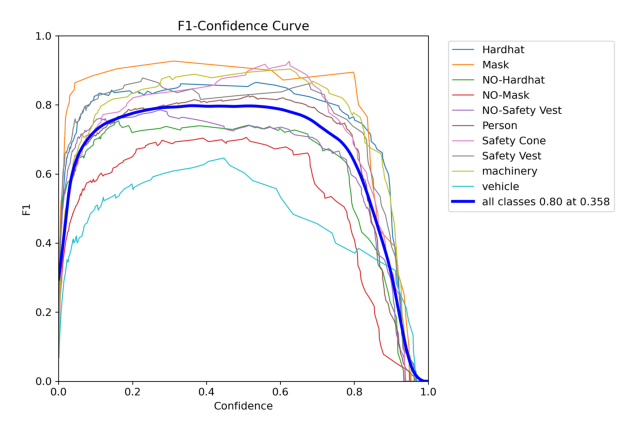



runs/detect/yolov8n_v1_train_without_data_augmentation/PR_curve.png


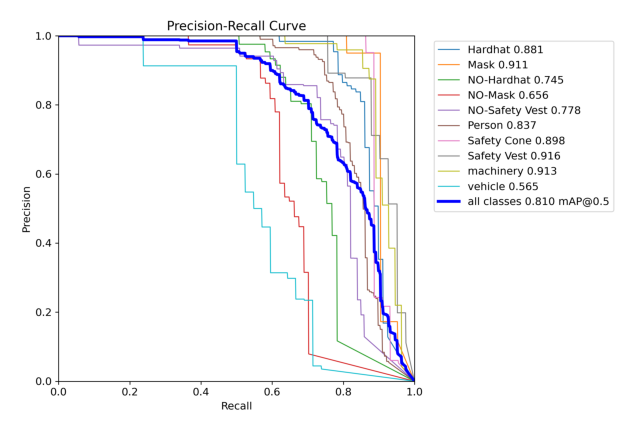



runs/detect/yolov8n_v1_train_without_data_augmentation/P_curve.png


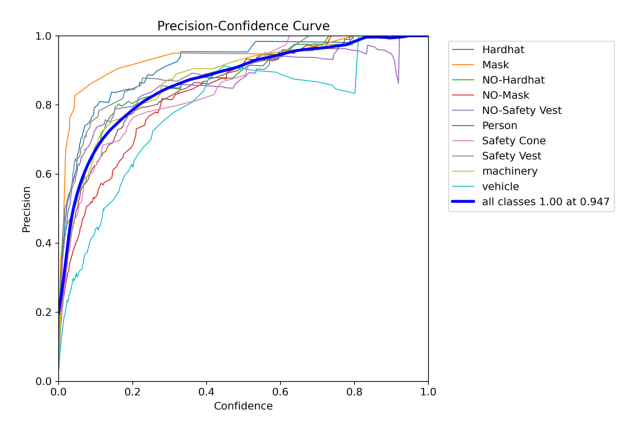



runs/detect/yolov8n_v1_train_without_data_augmentation/R_curve.png


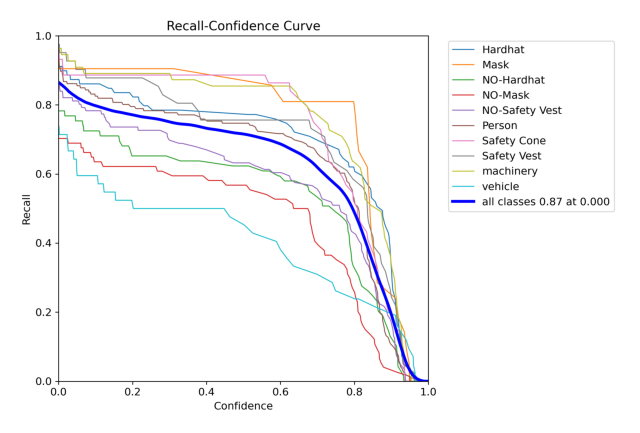



runs/detect/yolov8n_v1_train_without_data_augmentation/confusion_matrix.png


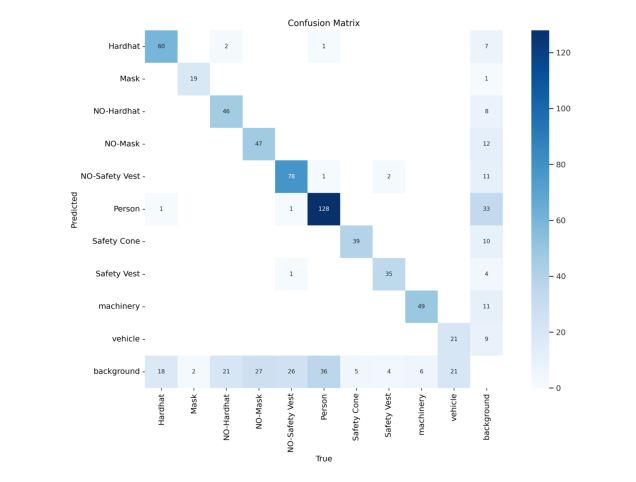



runs/detect/yolov8n_v1_train_without_data_augmentation/confusion_matrix_normalized.png


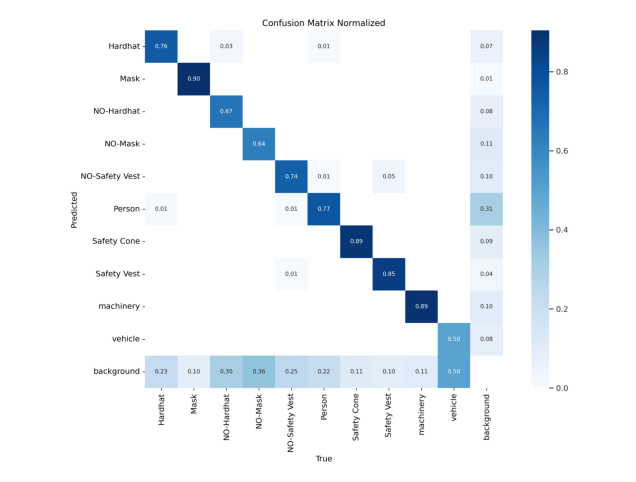



runs/detect/yolov8n_v1_train_without_data_augmentation/labels.jpg


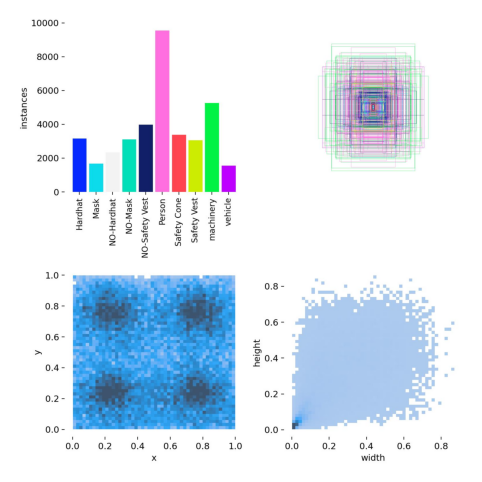



runs/detect/yolov8n_v1_train_without_data_augmentation/labels_correlogram.jpg


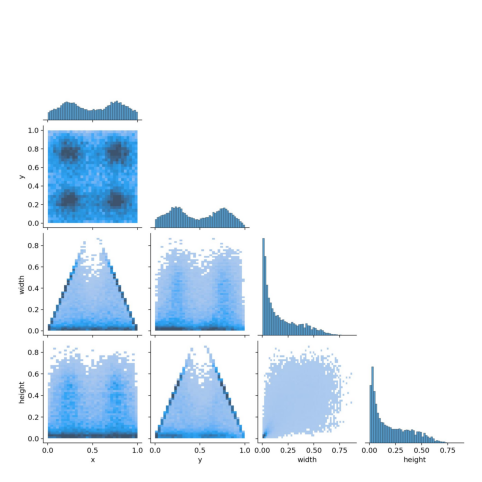



runs/detect/yolov8n_v1_train_without_data_augmentation/results.png


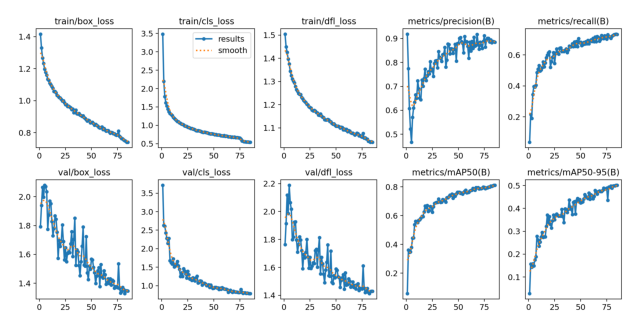

In [22]:

for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

In [23]:
!zip -r /kaggle/working/workspace_with_augmentation.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolov8m.pt (deflated 8%)
  adding: kaggle/working/yolov8n.pt (deflated 9%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs2/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs2/args.yaml (deflated 54%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/indianworkers.avi (deflated 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs3/ (stored 0%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs3/results.csv (deflated 46%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs3/events.out.tfevents.1741340377.648f0704f493.31.0 (deflated 94%)
  adding: kaggle/working/runs/detect/yolov8m_v1_train_with_more_epochs3/train_bat

## YOLOv8s model


In [12]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 163MB/s]


In [ ]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),task='detect',imgsz=640,epochs=100,batch=-1,mode='train',name='yolov8s_v1_train')

Ultralytics 8.3.87 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v1_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 18.2MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:08<00:00, 291.57it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.13G reserved, 0.12G allocated, 14.49G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


    11139470       28.67         0.833         55.76         313.1        (1, 3, 640, 640)                    list
    11139470       57.33         1.132          27.5         117.1        (2, 3, 640, 640)                    list
    11139470       114.7         1.669         31.57         103.2        (4, 3, 640, 640)                    list
    11139470       229.3         2.691         57.35         114.4        (8, 3, 640, 640)                    list
    11139470       458.7         4.865         82.63         152.2       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 47 for CUDA:0 8.99G/14.74G (61%) ✅


train: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:03<00:00, 699.50it/s]

train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 251.17it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/yolo-construction-site-ppe-dataset/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8s_v1_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0003671875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8s_v1_train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.8G      1.377      2.466      1.482        409        640: 100%|██████████| 56/56 [00:42<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]

                   all        114        697      0.606      0.476       0.51       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.9G      1.194      1.428      1.339        469        640: 100%|██████████| 56/56 [00:44<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

                   all        114        697      0.546      0.381      0.382      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.9G      1.191      1.381      1.346        403        640: 100%|██████████| 56/56 [00:48<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        114        697      0.624      0.375      0.426      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.9G      1.215      1.367      1.347        430        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all        114        697      0.546      0.423      0.429      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.8G       1.17      1.279      1.328        480        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


                   all        114        697      0.558      0.405      0.415      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.4G      1.146      1.217      1.308        329        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all        114        697      0.664      0.476      0.535      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        13G      1.115      1.143       1.29        346        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        114        697      0.746      0.506      0.565      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        13G      1.096       1.11      1.272        481        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all        114        697      0.778      0.526      0.608      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100        13G       1.08      1.068      1.261        422        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all        114        697      0.715      0.565      0.613      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        13G       1.05      1.029       1.24        538        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        114        697      0.735      0.558      0.605      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        13G      1.047      1.003      1.236        421        640: 100%|██████████| 56/56 [00:50<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all        114        697      0.809      0.575      0.658      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        13G      1.023     0.9706      1.222        373        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        114        697      0.724      0.542      0.601      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100        13G      1.009     0.9369      1.206        379        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all        114        697       0.81      0.625      0.687      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        13G     0.9958      0.911        1.2        297        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]


                   all        114        697      0.778      0.664       0.71      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        13G      0.982     0.8906       1.19        327        640: 100%|██████████| 56/56 [00:50<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


                   all        114        697       0.73      0.611      0.673      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        13G     0.9812     0.8827       1.19        388        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all        114        697      0.812      0.636      0.701       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100        13G     0.9541     0.8578      1.177        538        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all        114        697      0.809       0.65      0.707      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        13G     0.9571     0.8516      1.174        554        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


                   all        114        697       0.85      0.651      0.731      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        13G     0.9444     0.8332      1.165        551        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        114        697      0.859      0.649      0.735      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        13G     0.9277     0.8169      1.157        454        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


                   all        114        697      0.833      0.656       0.74      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        13G     0.9236     0.7948       1.15        544        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]


                   all        114        697      0.839      0.663      0.748      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        13G     0.9134     0.7858      1.145        485        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]


                   all        114        697      0.845      0.712      0.772      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100        13G     0.9108     0.7777      1.141        520        640: 100%|██████████| 56/56 [00:49<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]


                   all        114        697      0.869      0.674      0.761      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        13G     0.8987     0.7646      1.137        490        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


                   all        114        697      0.854      0.679      0.756      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        13G     0.8904      0.749      1.127        532        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


                   all        114        697       0.91      0.682      0.775      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        13G     0.8859     0.7509      1.127        374        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all        114        697      0.855      0.659      0.741      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        13G     0.8694     0.7246      1.117        521        640: 100%|██████████| 56/56 [00:50<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


                   all        114        697      0.853      0.715      0.776      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        13G     0.8636     0.7163      1.106        509        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all        114        697      0.846      0.718      0.787      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        13G     0.8574     0.7062      1.106        391        640: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all        114        697      0.862      0.721       0.79      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        13G     0.8472     0.6977      1.104        875        640:  52%|█████▏    | 29/56 [00:26<00:24,  1.11it/s]